In [2]:
from matplotlib import pyplot as plt
%matplotlib notebook
import numpy as np
from skimage.io import imread,imsave

(800, 1200, 3)


<IPython.core.display.Javascript object>


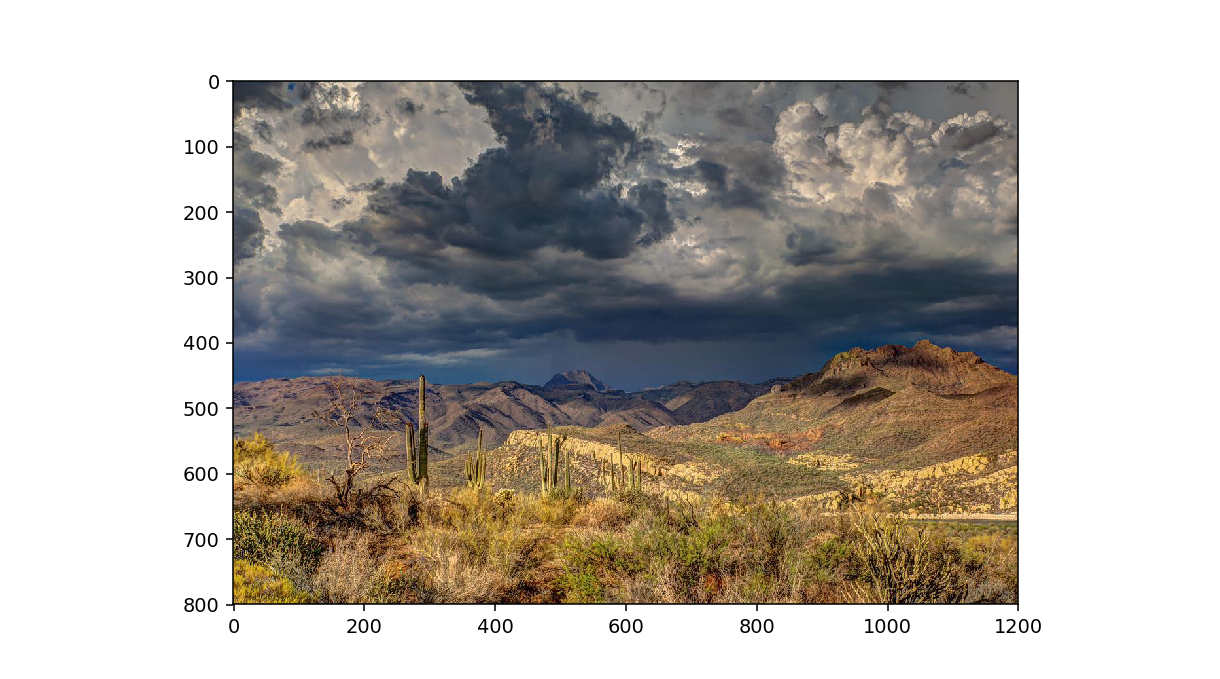

In [3]:
im = imread('desert.jpg')
print(im.shape)

plt.figure()
plt.imshow(im)
plt.show()

<IPython.core.display.Javascript object>


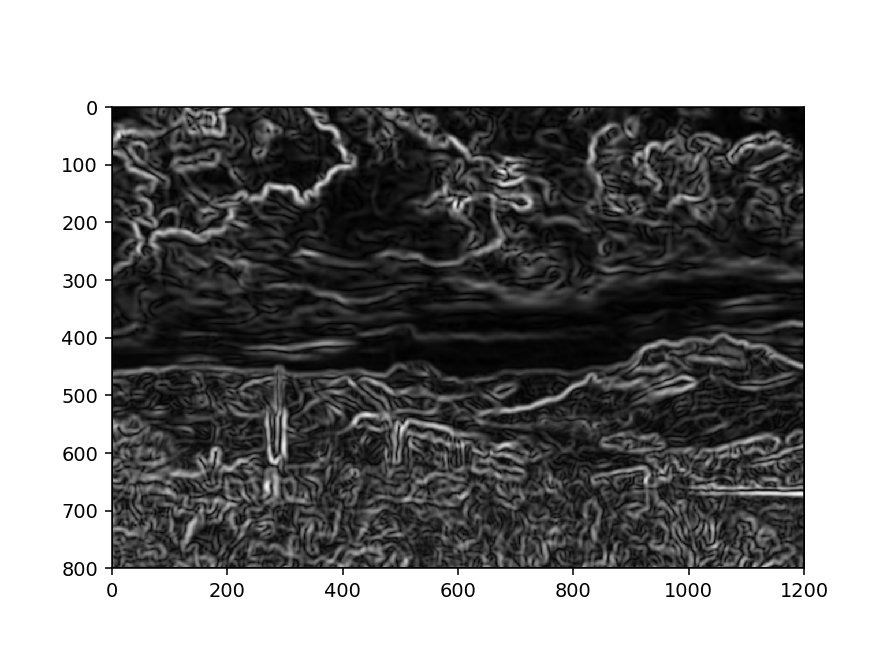

In [7]:
from skimage.filters import sobel,gaussian

im_ = gaussian(im, sigma=4)
br = sobel(im_[:,:,0])
bg = sobel(im_[:,:,1])
bb = sobel(im_[:,:,2])
brgb = br+bg+bb

plt.figure()
plt.imshow(brgb, cmap=plt.cm.gray)
plt.show()

<IPython.core.display.Javascript object>


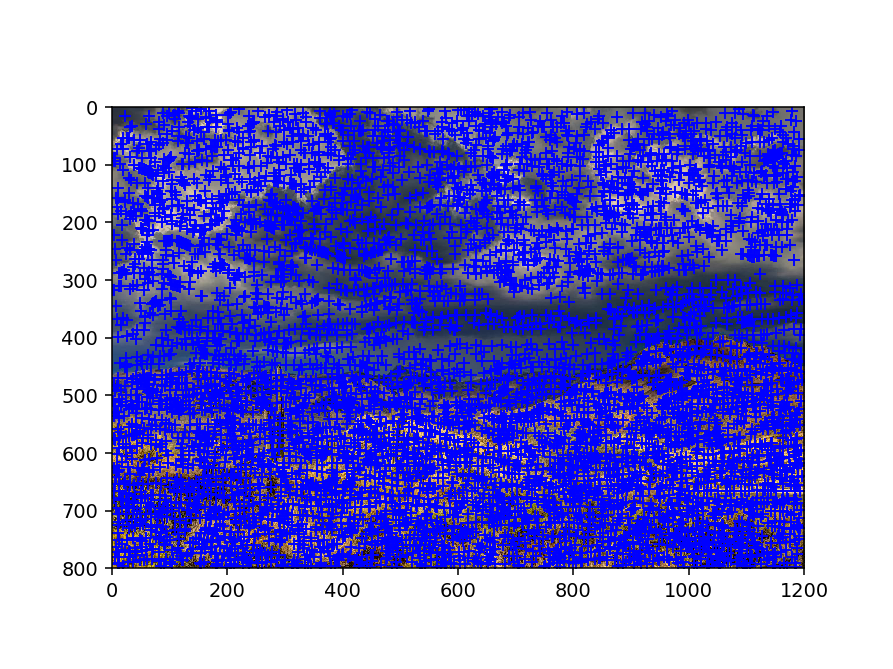

In [8]:
from skimage.feature import peak_local_max

markers = peak_local_max(brgb.max()-brgb)
plt.figure()
plt.imshow(im)
plt.plot(markers[:,1],markers[:,0],'b+')
plt.show()

<IPython.core.display.Javascript object>


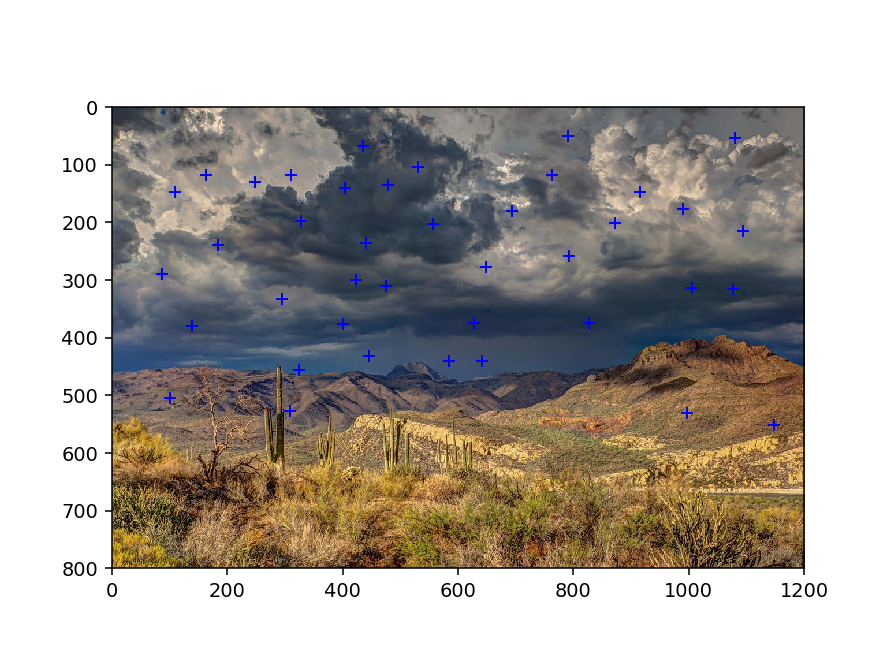

In [15]:
markers = peak_local_max(brgb.max()-brgb, threshold_rel=0.99, min_distance=50)

plt.figure()
plt.imshow(im)
plt.plot(markers[:,1],markers[:,0],'b+')
plt.show()

<IPython.core.display.Javascript object>


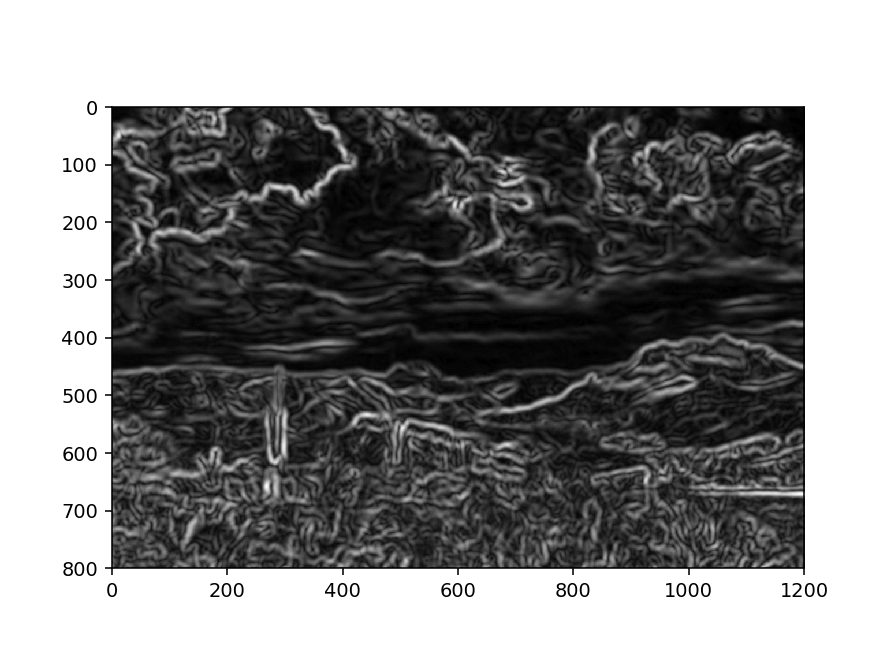

In [21]:
from skimage.filters import rank
from skimage.morphology import disk

im_ = gaussian(im, sigma=4)
gradr = rank.gradient(im_[:,:,0],disk(3)).astype('int')
gradg = rank.gradient(im_[:,:,1],disk(3)).astype('int')
gradb = rank.gradient(im_[:,:,2],disk(3)).astype('int')
grad = gradr+gradg+gradb

plt.figure()
plt.imshow(grad, cmap=plt.cm.gray)
plt.show()

<IPython.core.display.Javascript object>


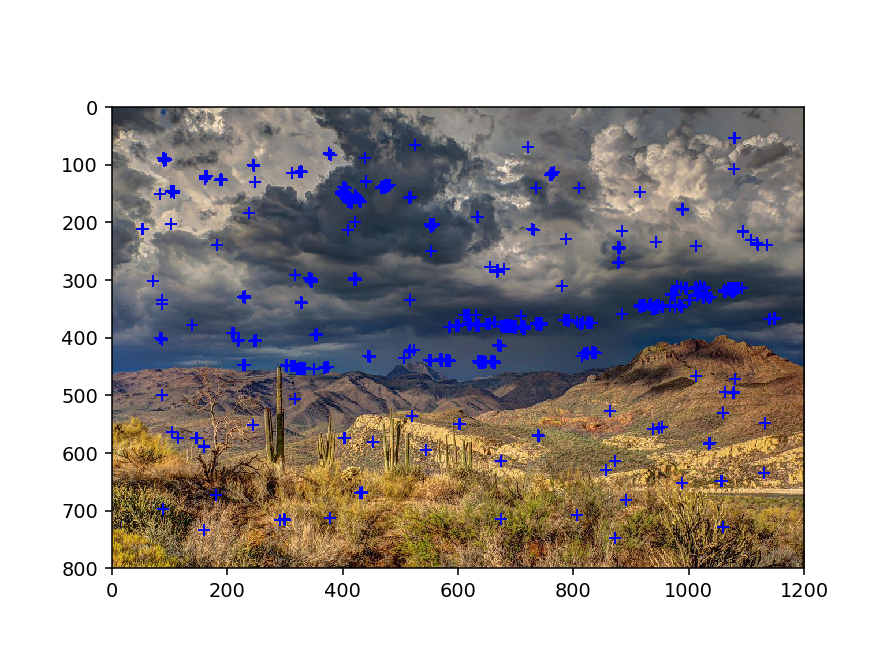

In [22]:
markers = peak_local_max(grad.max()-grad, threshold_rel=0.95, min_distance=50)

plt.figure()
plt.imshow(im)
plt.plot(markers[:,1],markers[:,0],'b+')
plt.show()